In [1]:
#import all packages and libraries
import panel as pn
pn.extension('plotly')
import plotly.express as px
import requests
import pandas as pd
import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')
import statistics

In [2]:
#MAPBOX_TOKEN 
load_dotenv()
mapbox_token = os.getenv("MAPBOX_TOKEN")

In [3]:
#load csv and check data
isd_data = pd.read_csv("dfw_real_estate_isd.csv")
#isd_data.dropna(inplace = True) # dropna is dropping all rows
isd_data.shape

(68, 30)

In [4]:
#checking for null value
isd_data.isnull().any()

district_name                False
county_name                  False
primary_city                 False
total_households_isd         False
median_income_isd            False
mean_income_isd              False
district_rating_2019         False
district_rating_2019_num     False
grad_rate                     True
dropout_rate                  True
2016_property_value_total    False
2016_avg_property_value       True
2016_isd_taxrate             False
2016_avg_annual_taxdue       False
2017_property_value_total    False
2017_avg_property_value      False
2017_isd_taxrate             False
2017_avg_annual_taxdue       False
2018_property_value_total    False
2018_avg_property_value      False
2018_isd_taxrate             False
2018_avg_annual_taxdue       False
2019_property_value_total    False
2019_avg_property_value      False
2019_isd_taxrate             False
2019_avg_annual_taxdue       False
2020_property_value_total    False
2020_avg_property_value      False
2020_isd_taxrate    

In [5]:
# Count nulls 
isd_data.isnull().sum()

district_name                 0
county_name                   0
primary_city                  0
total_households_isd          0
median_income_isd             0
mean_income_isd               0
district_rating_2019          0
district_rating_2019_num      0
grad_rate                    68
dropout_rate                 68
2016_property_value_total     0
2016_avg_property_value       1
2016_isd_taxrate              0
2016_avg_annual_taxdue        0
2017_property_value_total     0
2017_avg_property_value       0
2017_isd_taxrate              0
2017_avg_annual_taxdue        0
2018_property_value_total     0
2018_avg_property_value       0
2018_isd_taxrate              0
2018_avg_annual_taxdue        0
2019_property_value_total     0
2019_avg_property_value       0
2019_isd_taxrate              0
2019_avg_annual_taxdue        0
2020_property_value_total     0
2020_avg_property_value       0
2020_isd_taxrate              0
2020_avg_annual_taxdue        0
dtype: int64

In [6]:
isd_data.drop(columns="grad_rate",inplace=True)
isd_data.drop(columns="dropout_rate",inplace=True)
#isd_data.head()

In [7]:
isd_data["2016_avg_property_value"]=isd_data["2016_avg_property_value"].fillna(0)

In [8]:
isd_data.shape

(68, 28)

In [9]:
isd_data.head()

district_name county_name primary_city  total_households_isd  \
0      aledo_isd     tarrant        aledo                  8472   
1      allen_isd      collin        allen                 35168   
2       anna_isd      collin         anna                  4521   
3     argyle_isd      denton       argyle                  3995   
4  arlington_isd     tarrant    arlington                127983   

   median_income_isd  mean_income_isd district_rating_2019  \
0             124106           154834                    A   
1             102425           129030                    A   
2              91239            94781                    B   
3             143902           175273                    A   
4              57889            76263                    B   

   district_rating_2019_num  2016_property_value_total  \
0                         4               2.801214e+09   
1                         4               1.126948e+10   
2                         3               8.731257e+08   
3                         4               1.522886e+09   
4                         3               2.366369e+10   

   2016_avg_property_value  ...  2018_isd_taxrate 2018_avg_annual_taxdue  \
0                 443687.0  ...          0.015950            7334.272550   
1                 307000.0  ...          0.015500            5555.200000   
2                 163000.0  ...          0.016700            3595.510000   
3                 427365.0  ...          0.015851            7522.266888   
4                 156836.0  ...          0.013687            2562.204987   

   2019_property_value_total  2019_avg_property_value  2019_isd_taxrate  \
0               4.138532e+09                 495499.0          0.014933   
1               1.520374e+10                 373468.0          0.014589   
2               1.551390e+09                 234271.0          0.015683   
3               2.444932e+09                 480208.0          0.015080   
4               3.189531e+10                 210751.0          0.012987   

   2019_avg_annual_taxdue  2020_property_value_total  2020_avg_property_value  \
0             7399.286567               4.289396e+09                 490579.0   
1             5448.524652               1.600000e+10                 371000.0   
2             3674.189229               1.685000e+09                 239000.0   
3             7241.536640               2.795960e+09                 496433.0   
4             2736.960012               3.317751e+10                 209132.0   

   2020_isd_taxrate  2020_avg_annual_taxdue  
0          0.014797                 7259.10  
1          0.014325                 5314.58  
2          0.014746                 3524.29  
3          0.014187                 7042.89  
4          0.013871                 2900.87  

[5 rows x 28 columns]

In [10]:
statistics.mean(isd_data['median_income_isd'])

84366.92647058824

In [11]:
statistics.stdev(isd_data['median_income_isd'])

28135.346953936667

In [12]:
isd_ranking_df =  isd_data[['district_name','county_name','district_rating_2019']]

In [13]:
isd_ranking_df = isd_ranking_df.rename(columns = {
    "district_rating_2019": "district_rating"
})

In [14]:
isd_ranking_df.district_rating[isd_ranking_df.district_rating =='A'] =4
isd_ranking_df.district_rating[isd_ranking_df.district_rating =='B'] =3
isd_ranking_df.district_rating[isd_ranking_df.district_rating =='C'] =2
isd_ranking_df.district_rating[isd_ranking_df.district_rating =='D'] =1

In [15]:
isd_ranking_df.head()

district_name county_name district_rating
0      aledo_isd     tarrant               4
1      allen_isd      collin               4
2       anna_isd      collin               3
3     argyle_isd      denton               4
4  arlington_isd     tarrant               3

In [16]:
fig_rate_collin =px.sunburst(
    isd_ranking_df[isd_ranking_df["county_name"] == "collin"],
    names='district_name',
    parents='county_name',
    values='district_rating',
    color='district_name',
    title = "School Rating By School District - Collin"
    
)
#fig_rate_collin.show()

In [17]:
fig_rate_dallas =px.sunburst(
    isd_ranking_df[isd_ranking_df["county_name"] == "dallas"],
    names='district_name',
    parents='county_name',
    values='district_rating',
    color='district_name',
    title = "School Rating By School District - Dallas"
    
)

In [18]:
fig_rate_denton =px.sunburst(
    isd_ranking_df[isd_ranking_df["county_name"] == "denton"],
    names='district_name',
    parents='county_name',
    values='district_rating',
    color='district_name',
    title = "School Rating By School District - Denton"
    
)

In [19]:
fig_rate_tarrant =px.sunburst(
    isd_ranking_df[isd_ranking_df["county_name"] == "tarrant"],
    names='district_name',
    parents='county_name',
    values='district_rating',
    color='district_name',
    title = "School Rating By School District - Tarrant"
    
)

In [20]:
fig_rate = pn.Row(fig_rate_collin,fig_rate_dallas,fig_rate_denton,fig_rate_tarrant)
#fig_rate

In [21]:
fig_tax_collin =px.sunburst(
    isd_data[isd_data["county_name"] == "collin"],
    names='district_name',
    parents='county_name',
    values='2019_avg_annual_taxdue',
    color='district_name',
    title='Average Annual Tax Due - Collin County'
)
#fig_tax_collin

In [22]:
fig_tax_denton =px.sunburst(
    isd_data[isd_data["county_name"] == "denton"],
    names='district_name',
    parents='county_name',
    values='2019_avg_annual_taxdue',
    color='district_name',
    title='Average Annual Tax Due - Denton County'
)

In [23]:
fig_tax_dallas =px.sunburst(
    isd_data[isd_data["county_name"] == "dallas"],
    names='district_name',
    parents='county_name',
    values='2019_avg_annual_taxdue',
    color='district_name',
    title='Average Annual Tax Due - Dallas County'
)

In [24]:
fig_tax_tarrant =px.sunburst(
    isd_data[isd_data["county_name"] == "tarrant"],
    names='district_name',
    parents='county_name',
    values='2019_avg_annual_taxdue',
    color='district_name',
    title='Average Annual Tax Due - Tarrant County'
)

In [25]:
fig_tax = pn.Row(fig_tax_collin,fig_tax_dallas,fig_tax_denton,fig_tax_tarrant)
#fig_tax

In [26]:
fig_sunburst = pn.Column(fig_rate,fig_tax)
#fig_sunburst

In [27]:
top20_city = isd_data.groupby(['primary_city']).mean()
top20_city.sort_values(['median_income_isd'], ascending=False, inplace=True)
top20_city = top20_city.reset_index().head(20)
#top20_city

In [28]:
plot_category = px.parallel_categories(
    top20_city,
    dimensions=['primary_city', 'total_households_isd', 'district_rating_2019_num', 'median_income_isd','2019_avg_annual_taxdue'],
    color='median_income_isd',
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        'primary_city': 'City',
        'median_income_isd': 'Median Income - ISD',
        'total_households_isd': 'Total House',
        'district_rating_2019_num': 'District Rating',
        '2019_avg_annual_taxdue':'Avg Annual Tax Due'
        },
    width=600,
    title = 'Top 20 District Rating with City Median Houholds Income and Avg. Tax Due'
)
#plot_category.show()

In [29]:
fig_tree = px.treemap(isd_data, path=['primary_city', 'total_households_isd','2019_avg_annual_taxdue'], 
                    values='median_income_isd',
                      color='district_rating_2019_num', hover_data=['2019_avg_annual_taxdue'],
                      color_continuous_scale='RdBu',
                      color_continuous_midpoint=np.average(isd_data['district_rating_2019_num'], 
                      weights=isd_data['median_income_isd']),
                     title = "District Rating by City",
                     width=1000)
#fig_tree.show()

In [30]:
scatter_3d=px.scatter_3d(isd_data,
             x="district_rating_2019_num",
             y="total_households_isd",
             z = "2019_avg_annual_taxdue",
             color= "primary_city",
             size = "median_income_isd"
            )
#scatter_3d

In [31]:
#isd_2016_df =  isd_data[['district_name','county_name','2016_property_value_total', '2016_avg_property_value','2016_isd_taxrate', '2016_avg_annual_taxdue']]

In [32]:
#isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace(",", "")
#isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace("-", "")
#isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace("    ", "")
#isd_2016_df["avg_annual_taxdue"] = pd.to_numeric(isd_2016_df["avg_annual_taxdue"])
#isd_2016_df.dtypes

In [33]:
scatter_plot = px.scatter(
    isd_data,
    x="median_income_isd",
    y="district_name", 
    size = "median_income_isd", 
    color = "county_name",
    hover_name = 'district_name',
    title= "Median Household Income of Isd by County"
)

In [34]:
#scatter_plot

In [35]:
isd_data_by_county = isd_data.groupby(['district_name','county_name']).mean().reset_index()
isd_data_by_county.head(10)

district_name county_name  total_households_isd  median_income_isd  \
0       aledo_isd     tarrant                  8472             124106   
1       allen_isd      collin                 35168             102425   
2        anna_isd      collin                  4521              91239   
3      argyle_isd      denton                  3995             143902   
4   arlington_isd     tarrant                127983              57889   
5      aubrey_isd      denton                  4005              89828   
6        azle_isd     tarrant                 13818              71697   
7   birdville_isd     tarrant                 49719              62639   
8       bland_isd      collin                  1252              82500   
9  blue_ridge_isd      collin                  1143              59826   

   mean_income_isd  district_rating_2019_num  2016_property_value_total  \
0           154834                         4               2.801214e+09   
1           129030                         4               1.126948e+10   
2            94781                         3               8.731257e+08   
3           175273                         4               1.522886e+09   
4            76263                         3               2.366369e+10   
5           105492                         4               8.295684e+08   
6            94635                         3               2.452855e+09   
7            80955                         3               8.502482e+09   
8            88947                         4               1.070442e+07   
9            82242                         4               1.652475e+08   

   2016_avg_property_value  2016_isd_taxrate  2017_property_value_total  ...  \
0                 443687.0           0.01595               3.233804e+09  ...   
1                 307000.0           0.01590               1.263121e+10  ...   
2                 163000.0           0.01670               1.072846e+09  ...   
3                 427365.0           0.01570               1.797676e+09  ...   
4                 156836.0           0.01390               2.586012e+10  ...   
5                 204580.0           0.01510               9.663479e+08  ...   
6                 161428.0           0.01203               2.625687e+09  ...   
7                 154497.0           0.01454               9.376091e+09  ...   
8                 139000.0           0.01488               1.088350e+07  ...   
9                 106000.0           0.01571               2.084481e+08  ...   

   2018_isd_taxrate  2018_avg_annual_taxdue  2019_property_value_total  \
0          0.015950             7334.272550               4.138532e+09   
1          0.015500             5555.200000               1.520374e+10   
2          0.016700             3595.510000               1.551390e+09   
3          0.015851             7522.266888               2.444932e+09   
4          0.013687             2562.204987               3.189531e+10   
5          0.015900             3833.362800               1.185617e+09   
6          0.013290             2507.597070               3.243970e+09   
7          0.014539             2716.728462               1.128770e+10   
8          0.013640             2621.608000               1.549863e+07   
9          0.015715             2801.966670               3.027883e+08   

   2019_avg_property_value  2019_isd_taxrate  2019_avg_annual_taxdue  \
0                 495499.0          0.014933             7399.286567   
1                 373468.0          0.014589             5448.524652   
2                 234271.0          0.015683             3674.189229   
3                 480208.0          0.015080             7241.536640   
4                 210751.0          0.012987             2736.960012   
5                 255287.0          0.015683             4003.793665   
6                 211373.0          0.012474             2636.561116   
7                 209462.0          0.013839             2898.744618   
8                 2

In [36]:
#isd_data_by_county.hvplot.line(
#    "district_name",
#    "median_income_isd",
#    xlabel= "County Name",
#    ylabel="Income Value",
#    groupby="county_name",
#    rot=90,
#    width=1000,
#    height=800
#)

In [37]:
county_bar = isd_data_by_county.hvplot.bar(
    x='district_name', 
    y=['2016_avg_property_value', '2017_avg_property_value','2018_avg_property_value','2019_avg_property_value','2020_avg_property_value'], 
    xlabel='District Name', 
    ylabel='Avg. Property Value', 
    groupby='county_name', 
    rot=90, 
    width=1800, 
    height=800
).opts(yformatter="%.0f")

In [38]:
#tea_url = "https://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/School2020to2021/FeatureServer/0/query?where=1%3D1&outFields=Score,City,Postal,Country,DisplayX,DisplayY,Rank,Zip4,Phone,County_Nam,County_Num,Web_Addres,Performanc,Region&returnGeometry=false&outSR=4326&f=json"
#tea_url = "https://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/School2020to2021/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
tea_url ="https://opendata.arcgis.com/datasets/059432fd0dcb4a208974c235e837c94f_0.geojson"

In [39]:
def get_tea_data(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    response = requests.get(url,headers=headers)
    return response.json()['features']

In [40]:
tea_data = get_tea_data(tea_url)

tea_list = []
for data in tea_data:
    tea_list.append(data['properties'])
df_tea = pd.DataFrame.from_dict(tea_list)
df_tea_filtered = df_tea.loc[(df_tea['County_Nam'] == 'COLLIN COUNTY') | (df_tea['County_Nam'] == 'DALLAS COUNTY') | (df_tea['County_Nam'] == 'DENTON COUNTY') | (df_tea['County_Nam'] == 'TARRANT COUNTY')]
df_tea_filtered = df_tea_filtered.sort_values('County_Nam')
df_tea_filtered.dropna()
#df_tea_filtered.head()
#tea_data

FID Loc_name Status   Score Match_type  \
7808  7809    World      M  100.00          A   
2765  2766    World      M   97.10          A   
4606  4607    World      M   85.00          A   
2750  2751    World      M  100.00          A   
2749  2750    World      M  100.00          A   
...    ...      ...    ...     ...        ...   
3072  3073    World      M   98.82          A   
7595  7596    World      M  100.00          A   
7609  7610    World      M   97.57          A   
7637  7638    World      M  100.00          A   
7389  7390    World      M  100.00          A   

                                           Match_addr  \
7808            301 N 5th St, Princeton, Texas, 75407   
2765           11095 Monarch Dr, Frisco, Texas, 75033   
4606                            75078, Prosper, Texas   
2750           11020 CR-504, Blue Ridge, Texas, 75424   
2749           11020 CR-504, Blue Ridge, Texas, 75424   
...                                               ...   
3072  12120 Woodland Springs Dr, Keller, Texas, 76244   
7595        4212 Belden Ave, Fort Worth, Texas, 76132   
7609    2810 Prairie Hill Ln, Arlington, Texas, 76010   
7637         2900 E Broad St, Mansfield, Texas, 76063   
7389        4000 Dakota Trl, Fort Worth, Texas, 76135   

                                              LongLabel  \
7808            301 N 5th St, Princeton, TX, 75407, USA   
2765           11095 Monarch Dr, Frisco, TX, 75033, USA   
4606                            75078, Prosper, TX, USA   
2750           11020 CR-504, Blue Ridge, TX, 75424, USA   
2749           11020 CR-504, Blue Ridge, TX, 75424, USA   
...                                                 ...   
3072  12120 Woodland Springs Dr, Keller, TX, 76244, USA   
7595        4212 Belden Ave, Fort Worth, TX, 76132, USA   
7609    2810 Prairie Hill Ln, Arlington, TX, 76010, USA   
7637         2900 E Broad St, Mansfield, TX, 76063, USA   
7389        4000 Dakota Trl, Fort Worth, TX, 76135, USA   

                     ShortLabel      Addr_type Type  ... Zipcode4  \
7808               301 N 5th St   PointAddress       ...     1002   
2765           11095 Monarch Dr   PointAddress       ...     1753   
4606                      75078         Postal       ...            
2750               11020 CR-504   PointAddress       ...            
2749               11020 CR-504   PointAddress       ...     9730   
...                         ...            ...  ...  ...      ...   
3072  12120 Woodland Springs Dr   PointAddress       ...            
7595            4212 Belden Ave   PointAddress       ...     3010   
7609       2810 Prairie Hill Ln   PointAddress       ...     9999   
7637            2900 E Broad St   PointAddress       ...            
7389            4000 Dakota Trl  StreetAddress       ...     2899   

                   School_Pho      School_Fax                 School_Ema  \
7808  (469) 952-5400 ext:4003  (972) 736-6162   rboring@princetonisd.net   
2765           (469) 633-3550  (469) 633-3560     youngblB@friscoisd.org   
4606           (469) 219-2240  (972) 346-9625  ajandrews@prosper-isd.net   
2750           (972) 752-5707  (972) 752-5361       wgramsey@ednet10.net   
2749           (972) 752-5554  (972) 752-5361        webmaster@brisd.net   
...                       ...             ...                        ...   
3072           (817) 744-5900  (917) 741-0354  angie.nayfa@kellerisd.net   
7595           (817) 814-8300  (817) 814-8350              WEB@FWISD.ORG   
7609           (682) 867-0200  (682) 867-0217          jstephe9@aisd.net   
7637           (817) 299-2600  (817) 473-5747          info@misdmail.org   
7389           (817) 306-4240  (817) 327-3687           tmynyk@lwisd.org   

                School_Web            School_Pri Grade_Rang School_Enr  \
7808  www.princetonisd.net     MR RICHARD BORING        '06      397.0   
2765     www.friscoisd.org  MS BRENDA YOUNGBLOOD     'KG-05      719.0   
4606   www.prosper-isd.net    MRS ALISSA ANDREWS     'PK-05 

In [41]:
px.set_mapbox_access_token(mapbox_token)

In [57]:
map_plot = px.scatter_mapbox(
    df_tea_filtered,
    lat="Y",
    lon="X",
    size="Score",
    color="Score",
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name="District_1",
    title="School Score of City",
    zoom=11
   )
map_plot.show()

In [61]:
map_plot

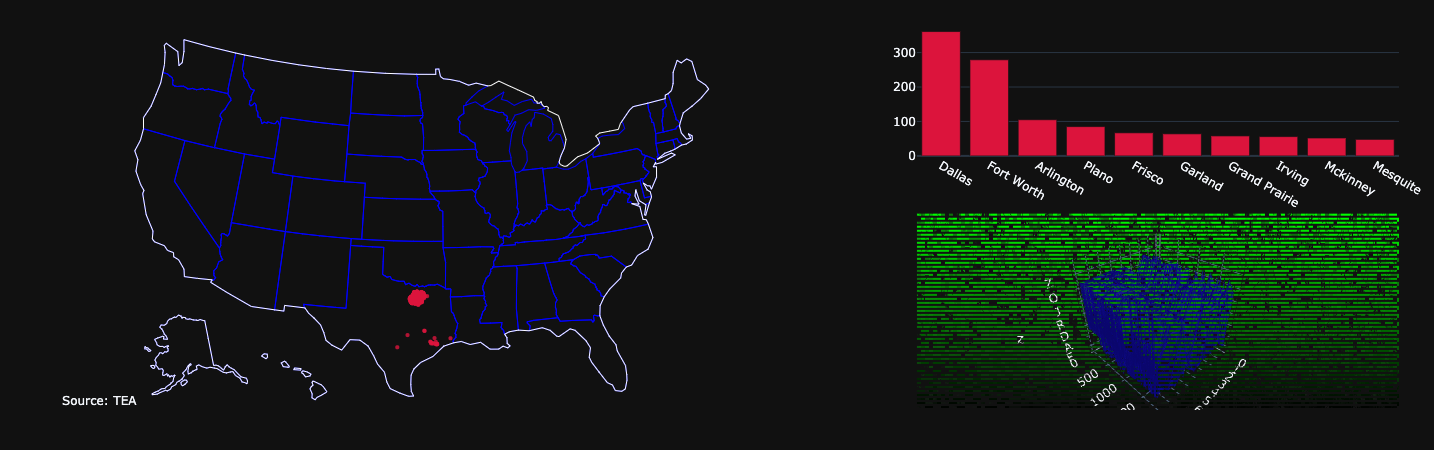

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

freq = df_tea_filtered.City.value_counts().reset_index().rename(columns={"index": "x"})

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

fig.add_trace(
    go.Scattergeo(lat=df_tea_filtered["Y"],
                  lon=df_tea_filtered["X"],
                  mode="markers",
                  hoverinfo="text",
                  showlegend=False,
                  marker=dict(color="crimson", size=4, opacity=0.8)),
    row=1, col=1
)

# Add City bar chart
fig.add_trace(
    go.Bar(x=freq["x"][0:10],y=freq["City"][0:10], marker=dict(color="crimson"), showlegend=False),
    row=1, col=2
)

# Add 3d surface  
fig.add_trace(
    go.Surface(z=df_tea_filtered["District_1"].values.tolist(), showscale=False),
    row=2, col=2
)

# Update geo subplot properties

fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="WHITE",
    showsubunits=True, subunitcolor="Blue"
)


# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=25, b=40, l=60),
    annotations=[
        dict(
            text="Source: TEA",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

#fig.show()


In [44]:
#isd_2016_df.columns

In [45]:
market_cap=isd_data_by_county.loc[:,["district_name","median_income_isd"]]
market_cap.head()

district_name  median_income_isd
0      aledo_isd             124106
1      allen_isd             102425
2       anna_isd              91239
3     argyle_isd             143902
4  arlington_isd              57889

In [46]:
market_cap.set_index("district_name", inplace = True)

In [47]:
#cap_large= market_cap.nlargest(20,"avg_property_value").hvplot.bar() # top largest data 
cap_large= market_cap.nlargest(25,"median_income_isd")
cap_large=cap_large.hvplot.bar(
    width=800,
    height= 600,
    rot=90,
    yformatter="%.2f",
    title="Households Income"
) # top largest data
#cap_large

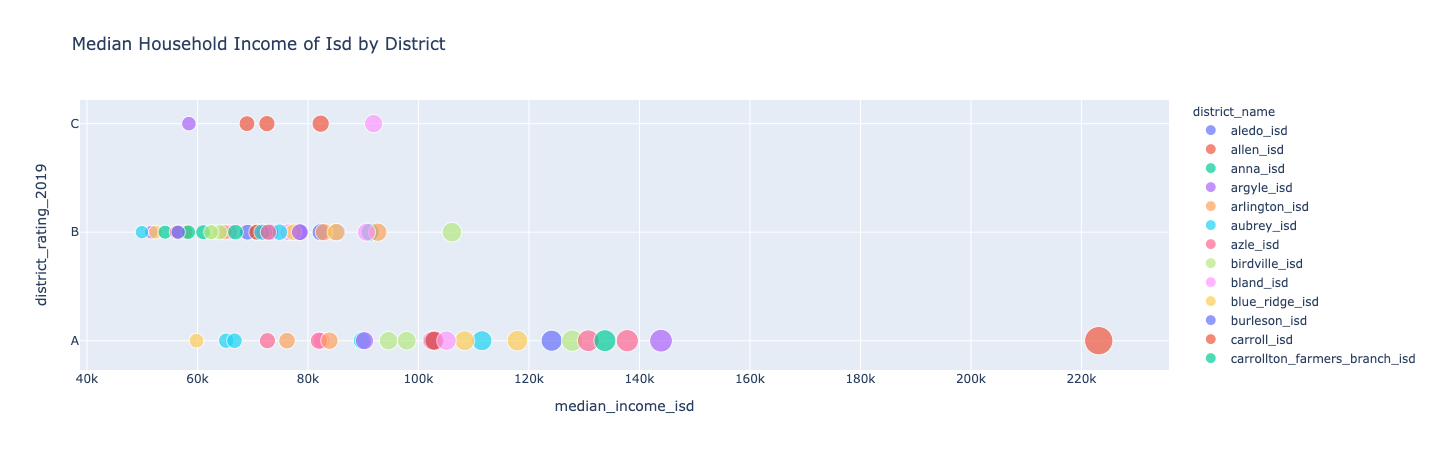

In [48]:
scatter_test_income = px.scatter(
    isd_data,
    x="median_income_isd",
    y="district_rating_2019",
    size ="median_income_isd",
    color = "district_name",
    hover_name = "district_name",
    title= "Median Household Income of Isd by District"
)
scatter_test_income

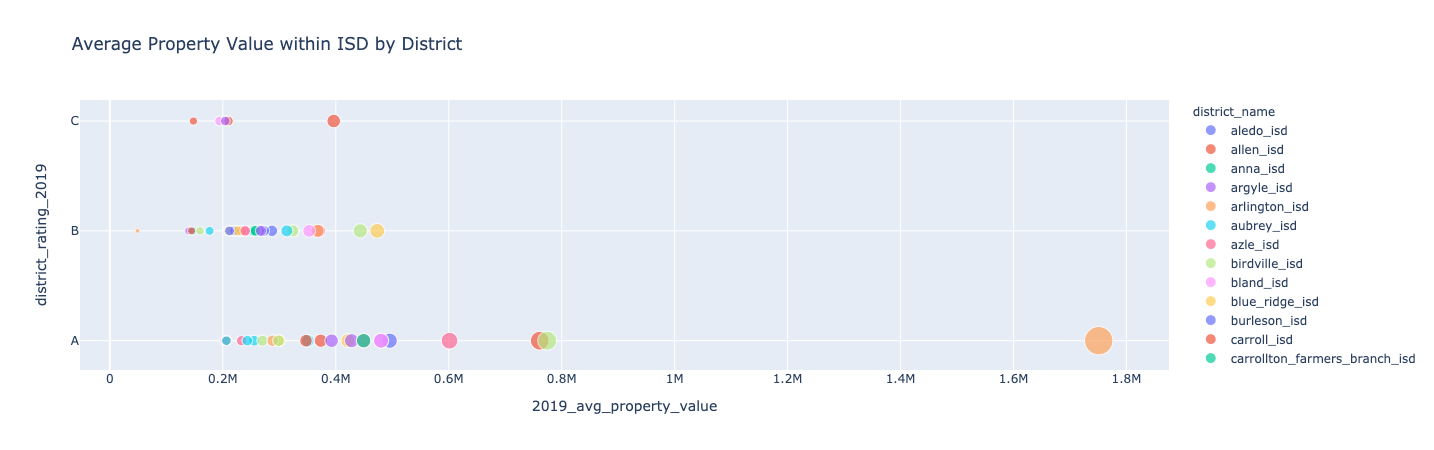

In [49]:
scatter_test_value = px.scatter(
    isd_data,
    x="2019_avg_property_value",
    y="district_rating_2019",
    size = "2019_avg_property_value",
    color = "district_name",
    hover_name = "district_name",
    title= "Average Property Value within ISD by District"
)
scatter_test_value

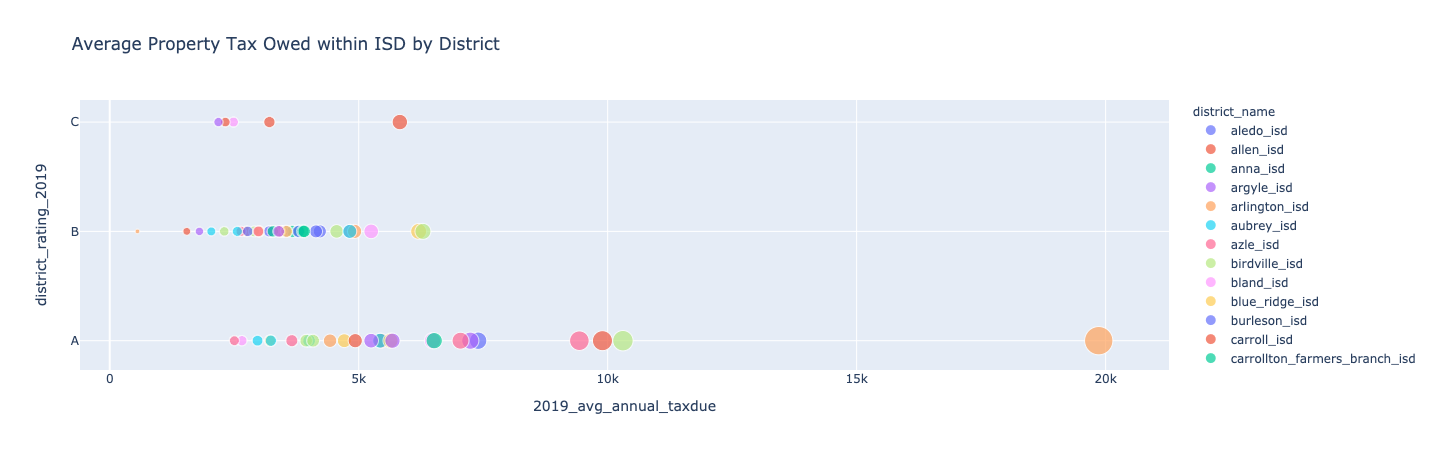

In [50]:
scatter_test_taxdue = px.scatter(
    isd_data,
    x="2019_avg_annual_taxdue",
    y="district_rating_2019",
    size = "2019_avg_annual_taxdue",
    color = "district_name",
    hover_name = "district_name",
    title= "Average Property Tax Owed within ISD by District"
)
scatter_test_taxdue


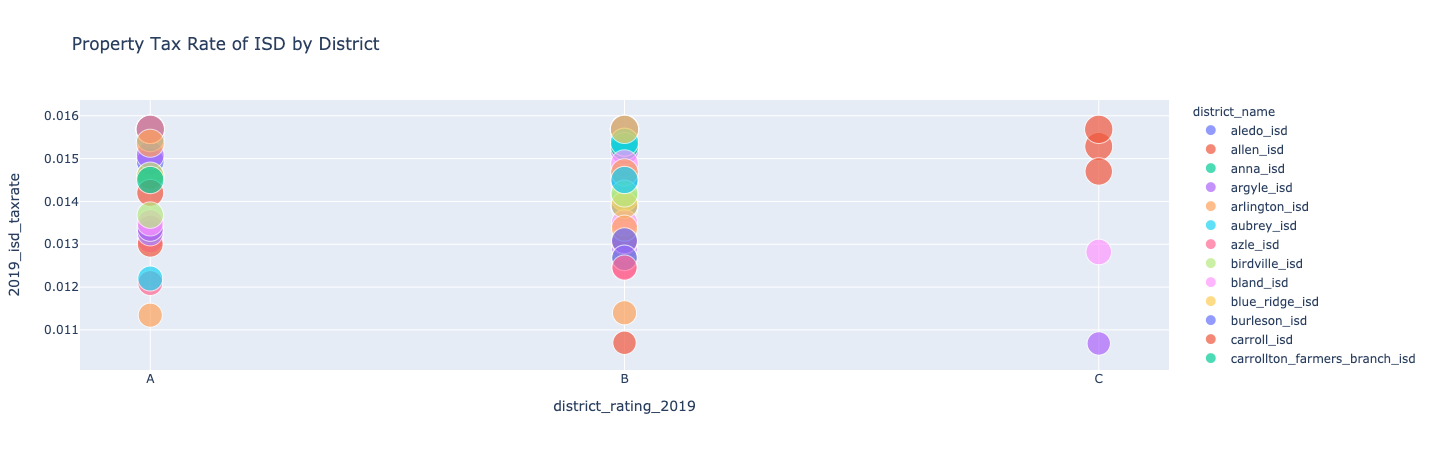

In [51]:
scatter_test_taxrate2 = px.scatter(
    isd_data,
    x="district_rating_2019",
    y="2019_isd_taxrate",
    size = "2019_isd_taxrate",
    color = "district_name",
    hover_name = "district_name",
    title= "Property Tax Rate of ISD by District"
)
scatter_test_taxrate2

In [52]:
welcome_plot_1 = pn.Row(scatter_test_income,scatter_test_value) 

In [53]:
welcome_plot_2 = pn.Row(scatter_test_taxdue,scatter_test_taxrate2) 

In [54]:
welcome_plot = pn.Column(welcome_plot_1,welcome_plot_2)

In [55]:
dashboard = pn.Tabs(
    (
        "Welcome",
        welcome_plot
    ),
    (
        "Households Income ",
        scatter_3d
    ),
    (
        "School Score",
        map_plot
    ),
    (
        "Households Income",
        cap_large
    ),
    ( 
        'Top 20 District Rating',
         plot_category
    ),
    (
        'District Rating',
         fig_tree
    ),
    (
        "Bar Analysis",
        county_bar
    ),
    (
        "Sunburst Plot Analysis",
        fig_sunburst
    ),
    (
        'Ratio',
        fig
    )
)

In [62]:
dashboard

Tabs
    [0] Column
        [0] Row
            [0] Plotly(Figure, viewport={'xaxis.range': [35419.399...})
            [1] Plotly(Figure, viewport={'xaxis.range': [-67633.46...})
        [1] Row
            [0] Plotly(Figure, viewport={'xaxis.range': [-764.3119...})
            [1] Plotly(Figure, viewport={'xaxis.range': [-0.227695...})
    [1] Plotly(Figure, name='Households Income ')
    [2] Plotly(Figure, name='School Score')
    [3] HoloViews(Bars, name='Households Income')
    [4] Plotly(Figure, name='Top 20 District Rating')
    [5] Plotly(Figure, name='District Rating')
    [6] Row(name='Bar Analysis')
        [0] HoloViews(DynamicMap, name='Bar Analysis')
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='county_name', options=['tarrant', 'collin', ...], value='tarrant', width=250)
            [1] VSpacer()
    [7] Column
        [0] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
            [2] Plotly(Figure)
            [3] Plotly(Figure)
        [1] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
            [2] Plotly(Figure)
            [3] Plotly(Figure)
    [8] Plotly(Figure, name='Ratio')